In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movies=pd.read_csv('C:/Users/lbhde/OneDrive - 중앙대학교/투빅스 파일/Week9/ml-latest-small/movies.csv')
ratings=pd.read_csv('C:/Users/lbhde/OneDrive - 중앙대학교/투빅스 파일/Week9/ml-latest-small/ratings.csv')
tags=pd.read_csv('C:/Users/lbhde/OneDrive - 중앙대학교/투빅스 파일/Week9/ml-latest-small/tags.csv')

### EDA proccess

In [42]:
def checkfile(df):
    print("Head")
    print("---------------------------------------------")
    print(f"{df.head()}")
    print()
    print("Types")
    print("---------------------------------------------")
    print(f"{df.dtypes}")
    print()
    print("Missing values")
    print("---------------------------------------------")    
    print(f"{df.isnull().sum()}")
    print()

In [43]:
checkfile(movies)

Head
---------------------------------------------
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Types
---------------------------------------------
movieId     int64
title      object
genres     object
dtype: object

Missing values
---------------------------------------------
movieId    0
title      0
genres     0
dtype: int64



In [7]:
movies['movieId'].nunique()

9742

In [44]:
checkfile(ratings)

Head
---------------------------------------------
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Types
---------------------------------------------
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

Missing values
---------------------------------------------
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64



In [9]:
ratings['userId'].nunique()

610

In [10]:
ratings['movieId'].nunique()

9724

In [11]:
ratings_movies = pd.merge(ratings, movies, on='movieId')

In [36]:
ratings_movies.tail()

,userId,movieId,rating,timestamp,title,genres
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,1493850155,31 (2016),Horror


인기있는 영화 장르 확인

In [33]:
unique_genre_dict = {}
for index, row in movies.iterrows():
    
    genre_combination = row['genres']
    parsed_genre = genre_combination.split('|')
    
    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1 

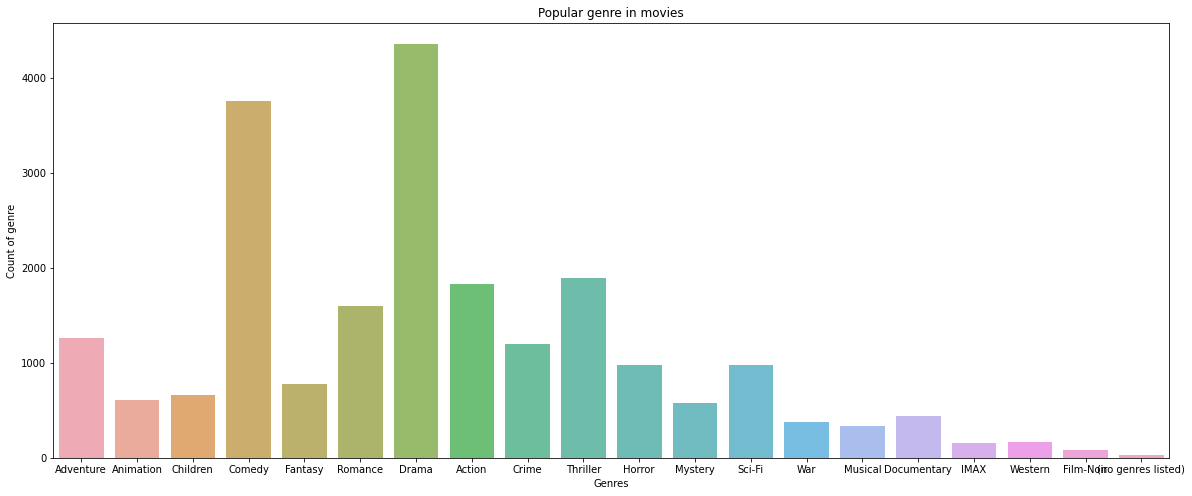

In [41]:
plt.rcParams['figure.figsize'] = [20,8]
sns.barplot(x=list(unique_genre_dict.keys()), y=list(unique_genre_dict.values()),
           alpha=0.8)
plt.title('Popular genre in movies')
plt.ylabel('Count of genre', fontsize=10)
plt.xlabel('Genres', fontsize=10)
plt.show()

영화의 평균 rating 찾기

In [13]:
ratings_movies.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

영화를 본 횟수-내림차순

In [14]:
ratings_movies.groupby('title').count()['rating'].sort_values(ascending=False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

영화 rating의 DataFrame만들기

In [15]:
ratings_df=pd.DataFrame(ratings_movies.groupby('title').mean()['rating'])
ratings_df

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


rating 횟수 추가

In [16]:
ratings_df['number of ratings'] = pd.DataFrame(ratings_movies.groupby('title').count()['rating'])

In [17]:
ratings_df.sort_values(by='rating', ascending=False)
ratings_df.head()

,rating,number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


 rating 수 분포 vs 영화 등장 횟수 확인

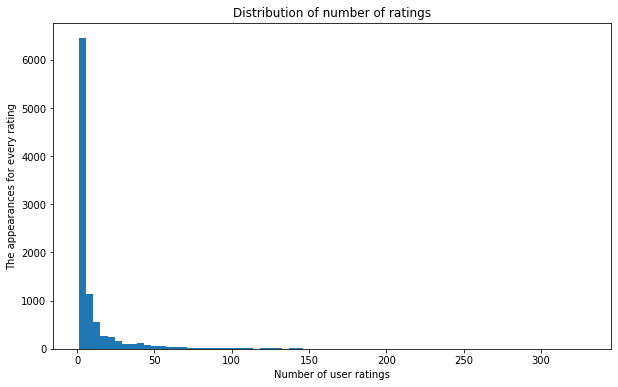

In [20]:
plt.figure(figsize=(10,6))
plt.hist(ratings_df['number of ratings'], bins=70)
plt.xlabel('Number of user ratings')
plt.ylabel('The appearances for every rating')
plt.title('Distribution of number of ratings')
plt.show()

Distribution of ratings

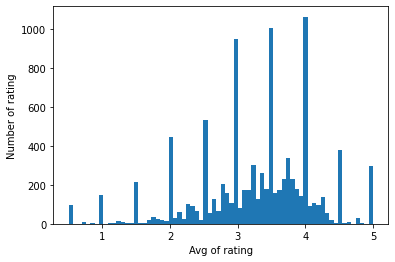

In [22]:
plt.hist(ratings_df['rating'],bins=70)
plt.xlabel('Avg of rating')
plt.ylabel('Number of rating')
plt.show()

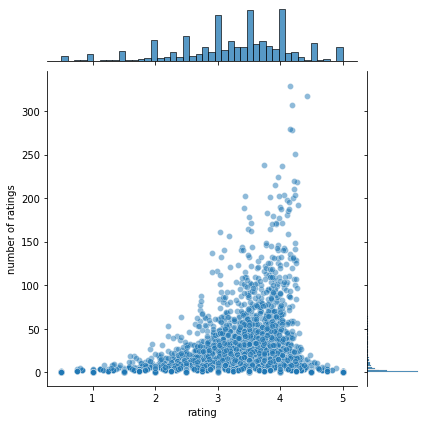

In [23]:
sns.jointplot(x = ratings_df['rating'], y = ratings_df['number of ratings'], data = ratings_df, alpha = 0.5)

# Model based

## SVD

In [60]:
import time
import operator


In [45]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [47]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings_movies[['userId', 'movieId', 'rating']], reader)
train_data = data.build_full_trainset()

In [49]:
train_start = time.time()
model = SVD(n_factors=8,
           lr_all=0.005,
           reg_all=0.02,
           n_epochs=100)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 3.05 seconds


### SVD - check

In [52]:
# 한 명의 데이터를 선정하여 확인한다. 
# userId 10을 선정
target_userId = 10
target_user_data = ratings_movies[ratings_movies['userId']==target_userId]
target_user_data.head(5)

,userId,movieId,rating,timestamp,title,genres
1824,10,296,1.0,1455303387,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2430,10,356,3.5,1455301685,Forrest Gump (1994),Comedy|Drama|Romance|War
12644,10,2571,0.5,1455356378,"Matrix, The (1999)",Action|Sci-Fi|Thriller
13852,10,2858,1.0,1455356578,American Beauty (1999),Drama|Romance
14325,10,2959,0.5,1455356582,Fight Club (1999),Action|Crime|Drama|Thriller


In [53]:
# 이를 dictionary 형태로 추출
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    movieId = row['movieId']
    target_user_movie_rating_dict[movieId] = row['rating']

target_user_movie_rating_dict

{296: 1.0,
 356: 3.5,
 2571: 0.5,
 2858: 1.0,
 2959: 0.5,
 3578: 4.0,
 58559: 4.5,
 91529: 5.0,
 106782: 1.0,
 109487: 0.5,
 588: 4.0,
 912: 4.0,
 1907: 4.0,
 2762: 0.5,
 4246: 3.5,
 597: 3.5,
 1784: 3.5,
 2671: 3.5,
 4306: 4.5,
 4993: 4.0,
 4995: 4.0,
 5952: 4.0,
 7153: 4.0,
 8636: 3.5,
 8665: 3.5,
 8808: 3.0,
 8961: 2.5,
 8970: 1.0,
 33794: 5.0,
 49272: 5.0,
 49286: 5.0,
 1028: 0.5,
 1088: 3.0,
 1247: 3.0,
 1307: 3.0,
 3882: 3.0,
 4447: 4.5,
 5066: 3.0,
 5377: 3.5,
 5620: 3.0,
 5943: 3.0,
 5957: 3.0,
 6155: 3.0,
 6266: 3.0,
 6377: 3.5,
 6535: 4.0,
 6942: 4.0,
 7149: 4.0,
 7151: 3.0,
 7154: 4.0,
 7169: 4.5,
 7293: 3.5,
 7375: 4.0,
 7451: 3.5,
 7458: 5.0,
 8529: 3.5,
 8533: 5.0,
 8869: 5.0,
 8969: 3.5,
 30749: 3.5,
 31433: 2.5,
 31685: 4.5,
 33145: 3.0,
 33679: 3.0,
 40629: 3.0,
 40819: 4.0,
 41285: 2.5,
 47099: 3.0,
 51662: 3.0,
 51705: 4.5,
 51834: 1.5,
 54286: 3.5,
 56367: 3.5,
 56949: 3.0,
 58047: 3.5,
 59333: 2.5,
 59421: 2.0,
 60397: 3.0,
 60950: 2.0,
 61250: 2.5,
 63113: 3.5,
 6

예측 모델에 10번 유저의 정보를 입력해 보지 않은 영화들의 평점을 예측

In [55]:
test_data = []            # 10번 유저가 보지 않은 영화의 리스트
for index, row in movies.iterrows():
    movieId = row['movieId']
    rating = 0
    if movieId in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movieId, rating))

In [56]:
target_user_predictions = model.test(test_data)

In [58]:
def get_user_predicted_ratings(predictions, userId, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if userId == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions, 
                                                            userId=target_user_id, 
                                                            user_history=target_user_movie_rating_dict)

In [62]:
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(), 
                                     key=operator.itemgetter(1), reverse=True)[:10]
target_user_top10_predicted

[(46, 5),
 (62, 5),
 (257, 5),
 (265, 5),
 (277, 5),
 (314, 5),
 (714, 5),
 (1035, 5),
 (1049, 5),
 (1172, 5)]

그리고 제목과 매칭하여 출력한다. 

In [63]:
movie_dict = {}
for index, row in movies.iterrows():
    movieId = row['movieId']
    movie_title = row['title']
    movie_dict[movieId] = movie_title

In [64]:
for predicted in target_user_top10_predicted:
    movieId = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movieId], ":", predicted_rating)

How to Make an American Quilt (1995) : 5
Mr. Holland's Opus (1995) : 5
Just Cause (1995) : 5
Like Water for Chocolate (Como agua para chocolate) (1992) : 5
Miracle on 34th Street (1994) : 5
Secret of Roan Inish, The (1994) : 5
Dead Man (1995) : 5
Sound of Music, The (1965) : 5
Ghost and the Darkness, The (1996) : 5
Cinema Paradiso (Nuovo cinema Paradiso) (1989) : 5


모델 평가하기 

In [66]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

In [67]:
model = SVD(n_factors=8,
           lr_all=0.005,
           reg_all=0.02,
           n_epochs=100)
model.fit(train_data)

predictions = model.test(test_data)

print("RMSE of test in SVD model:")
accuracy.rmse(predictions)

RMSE of test in SVD model:
RMSE: 0.8958


0.8958036449416173

10번 유저의 예측, 실제 평점을 비교한다.

In [68]:
test_data = []
for index, row in movies.iterrows():
    movieId = row['movieId']
    if movieId in target_user_movie_rating_dict:
        rating = target_user_movie_rating_dict[movieId]
        test_data.append((target_user_id, movieId, rating))

In [69]:
target_user_predictions = model.test(test_data)

In [70]:
def get_user_predicted_ratings(predictions, userId, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if userId == uid:
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

In [71]:
target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions, 
                                                            userId=target_user_id, 
                                                            user_history=target_user_movie_rating_dict)

In [72]:
target_user_movie_predict_dict

{296: 1.9821024612242395,
 356: 4.054749412319148,
 588: 3.0310920761759386,
 597: 3.3321692072586,
 912: 3.315117436664521,
 1028: 2.9962789608314377,
 1088: 3.3390490364620575,
 1247: 3.0632165035936976,
 1307: 2.9130905926132042,
 1784: 3.9907537424539856,
 1907: 3.524403878950333,
 2571: 2.7411289031355466,
 2671: 3.1209760604407983,
 2762: 2.109367315233226,
 2858: 1.0354748658744604,
 2959: 3.5084347059194982,
 3578: 4.319812782639739,
 3882: 3.2499815663615763,
 4246: 4.162333513314495,
 4306: 3.08978668774642,
 4447: 3.47913885847455,
 4993: 3.665286280799025,
 4995: 4.1059543621205945,
 5066: 2.619746388757794,
 5377: 3.446604401815386,
 5620: 2.820647678023376,
 5943: 3.2727122251517184,
 5952: 3.21530549502174,
 5957: 3.154442461804583,
 6155: 3.364236024595782,
 6266: 2.940122013682791,
 6377: 4.347699046091504,
 6535: 3.938382982743752,
 6942: 4.864241635685374,
 7149: 3.1539080194326847,
 7151: 2.8471818776119306,
 7153: 3.7358204847671708,
 7154: 3.8529611507944512,
 716

실제 평점과 비교

In [73]:
origin_rating_list = []
predicted_rating_list = []
movie_title_list = []
idx = 0
for movieId, predicted_rating in target_user_movie_predict_dict.items():
    idx = idx + 1
    predicted_rating = round(predicted_rating,2)
    origin_rating = target_user_movie_rating_dict[movieId]
    movie_title = movie_dict[movieId]
    print("movie", str(idx), ":", movie_title, ":", origin_rating, "/", predicted_rating)
    origin_rating_list.append(origin_rating)
    predicted_rating_list.append(predicted_rating)
    movie_title_list.append(str(idx))

movie 1 : Pulp Fiction (1994) : 1.0 / 1.98
movie 2 : Forrest Gump (1994) : 3.5 / 4.05
movie 3 : Aladdin (1992) : 4.0 / 3.03
movie 4 : Pretty Woman (1990) : 3.5 / 3.33
movie 5 : Casablanca (1942) : 4.0 / 3.32
movie 6 : Mary Poppins (1964) : 0.5 / 3.0
movie 7 : Dirty Dancing (1987) : 3.0 / 3.34
movie 8 : Graduate, The (1967) : 3.0 / 3.06
movie 9 : When Harry Met Sally... (1989) : 3.0 / 2.91
movie 10 : As Good as It Gets (1997) : 3.5 / 3.99
movie 11 : Mulan (1998) : 4.0 / 3.52
movie 12 : Matrix, The (1999) : 0.5 / 2.74
movie 13 : Notting Hill (1999) : 3.5 / 3.12
movie 14 : Sixth Sense, The (1999) : 0.5 / 2.11
movie 15 : American Beauty (1999) : 1.0 / 1.04
movie 16 : Fight Club (1999) : 0.5 / 3.51
movie 17 : Gladiator (2000) : 4.0 / 4.32
movie 18 : Bring It On (2000) : 3.0 / 3.25
movie 19 : Bridget Jones's Diary (2001) : 3.5 / 4.16
movie 20 : Shrek (2001) : 4.5 / 3.09
movie 21 : Legally Blonde (2001) : 4.5 / 3.48
movie 22 : Lord of the Rings: The Fellowship of the Ring, The (2001) : 4.0 / 

# Memory based

## item-based

In [74]:
ratings_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [75]:
user_ratings = pd.pivot_table(ratings_movies, values='rating', index='movieId', columns='userId').reset_index(drop=True)
user_ratings.fillna(0, inplace=True)
user_ratings.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between movies
movie_similarity = cosine_similarity(user_ratings)
np.fill_diagonal(movie_similarity,0)
user_ratings=pd.DataFrame(movie_similarity)
user_ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.410562,0.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.296917,0.282438,0.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035573,0.106415,0.092406,0.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.308762,0.287795,0.417802,0.188376,0.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


추천할 영화 제목 임의로 입력해서 확인

In [78]:
user_inp="Toy Story (1995)"
inp=movies[movies['title']==user_inp].index.tolist()
inp=inp[0]
    
movies['similarity'] = user_ratings.iloc[inp]
movies.columns = ['movieId', 'title', 'release_date','similarity']
movies.head(2)

,movieId,title,release_date,similarity
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.000000
1,2,Jumanji (1995),Adventure|Children|Fantasy,0.410562


In [79]:
print("Recommended movies based on your choice of ",user_inp ,": \n", movies.sort_values( ["similarity"], ascending = False )[1:10])

Recommended movies based on your choice of  Toy Story (1995) : 
      movieId                                              title  \
418      480                               Jurassic Park (1993)   
615      780               Independence Day (a.k.a. ID4) (1996)   
224      260          Star Wars: Episode IV - A New Hope (1977)   
314      356                                Forrest Gump (1994)   
322      364                              Lion King, The (1994)   
910     1209  Once Upon a Time in the West (C'era una volta ...   
546      648                         Mission: Impossible (1996)   
963     1264                                        Diva (1981)   
968     1269                        Arsenic and Old Lace (1944)   

                                        release_date  similarity  
418                 Action|Adventure|Sci-Fi|Thriller    0.565637  
615                 Action|Adventure|Sci-Fi|Thriller    0.564262  
224                          Action|Adventure|Sci-Fi    0.55738